<a href="https://colab.research.google.com/github/maplerivertree/notes-9781787125933/blob/master/kernel_trick_for_linearly_inseparable_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

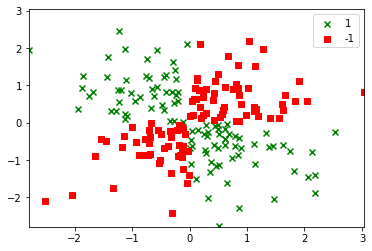

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)

y_xor = np.logical_xor(X_xor[:, 0] >0, X_xor[:, 1] >0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor ==1, 0], X_xor[y_xor ==1, 1], c='g', marker = 'x', label='1')
plt.scatter(X_xor[y_xor ==-1, 0], X_xor[y_xor ==-1, 1], c='r', marker = 's', label='-1')
plt.xlim([np.min(X_xor), np.max(X_xor)])
plt.ylim([np.min(X_xor), np.max(X_xor)])
plt.legend(loc = 'best')
plt.show()

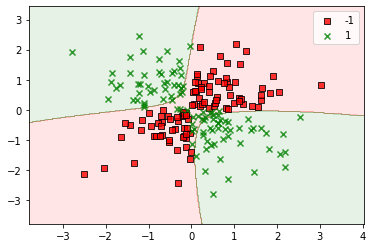

In [36]:
""" We cannot seperate this on a 2-D plane, 
so we need to project them to a higher-dimensional space 
via a mapping function where it becomes linearly separable

One of the most widely used kernels is the Radial Basis Function (RBF) kernel or simply called the Gaussian kernel

gamma (see Mathmatics breakdown on page 85 <<9781787125933>>) is the free parameter that is to be optimized

higher value leads to tighter and bumpier decision boundry

"""
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 821150, gamma = 0.10, C= 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier= svm)
plt.legend(loc= 'best')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'green', 'blue', 'black', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() +1
  x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() +1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z=Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c= colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha= 1.0, linewidth = 1, marker = 'o', s= 100, label = 'test set')